# Boston Housing Dataset

## About

The Boston Housing Dataset contains information collected by the US Census Service on various house prices in the area of Boston. The dataset is small in size with only 506 samples and 14 variables. It is a dataset that is widely used for machine learning. 

This assessment will include descriptive statistics and plots to describe the dataset, inferential statistics to analyse whether there is a significant difference in median house prices between houses that are along the Charles river and those that aren't and finally keras will be used to create a neural network to predict the medium house price based on the other variables in the dataset.



## Libraries

It is necessary to import various Python libraries to enable the analysis of the Boston Housing Dataset. I will be using NumPy, Pandas, Seaborn, Sklearn, Scipy, Keras and Matplotlib.

In [3]:
# for generating random variables
import numpy as np

# for plotting
import matplotlib.pyplot as plt 

# for managing data
import pandas as pd

# for plotting
import seaborn as sns 

# for t-tests and ANOVA
import scipy.stats as stats

import sklearn

# to create a neural network
import keras as kr

%matplotlib inline

# to increase the size of the plots as plots are too small otherwise
plt.rcParams['figure.figsize'] = (20.0, 10.0)

Using TensorFlow backend.


## Load the dataset

The Boston Housing dataset can be accessed through the scikit-learn library.

In [4]:
# load the dataset from the scikit-learn library

from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [5]:
# print the shape of the dataset and a description of the variables. This shows 506 samples, 14 variables and no missing values.

print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Create a Panda's Dataframe

The dats is transferred to a Panda's dataframe to carry out descriptive statistics on the dataset.

In [6]:
# load data into dataframe and print the first 5 rows of data

boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
# Median value is a missing variable - this needs to be added to the dataframe 

boston['MEDV'] = boston_dataset.target

In [8]:
# descriptive statistics are obtained using the describe function

boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Descriptive Statistics

The describe function produces the descriptive statistics on the dataset. The mean, standard deviation, maximum number, minimum number, 25% quartile range, 50% quartile range and 75% quartile range are produced for each of the 14 variables.

## Visualisations

## Inferential Statistics

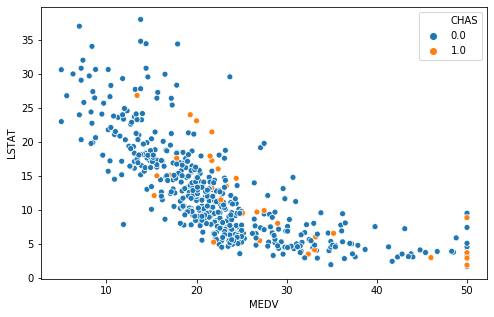

In [9]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=boston,x='MEDV',y='LSTAT', hue='CHAS')

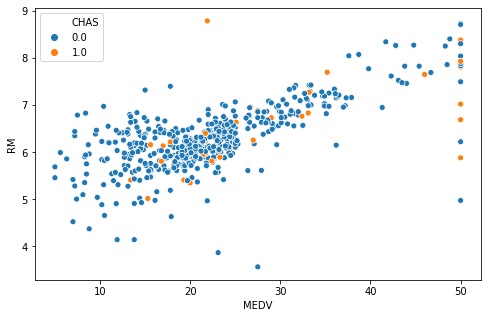

In [10]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=boston,x='MEDV',y='RM', hue='CHAS')

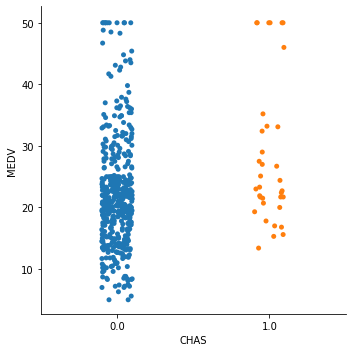

In [11]:
sns.catplot(data=boston,x='CHAS', y='MEDV')

In [15]:

import scipy.stats as ss

chas1=boston[boston['CHAS']==1]['MEDV']
chas0=boston[boston['CHAS']==0]['MEDV']
ss.ttest_ind(chas1, chas0)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)


Is there a significant difference in median house prices along the river?
The houses are well scattered along the river.

Running a t-test on the dataset produces a very small p-value significantly below 1%, so it is a clear statistically significant difference and we therefore have to reject the null hypothesis of equal averages.

# References

https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

http://www.datasciencemadesimple.com/descriptive-summary-statistics-python-pandas/
